In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

from evaluation import get_cm_sklearn, print_metrics
from preprocessing import TrainingPreProcessor

RANDOM_STATE = 0

train_set = pd.read_csv("input/train.csv")

training_preprocessor = TrainingPreProcessor()
training_preprocessor.fit(train_set, ignore_columns=["CLIENTNUM"])

X, y = training_preprocessor.transform(train_set)
class_weight = training_preprocessor.class_weight

## Grid search para floresta aleatória

In [8]:
xgboost_model = xgb.XGBClassifier(random_state=RANDOM_STATE)

In [12]:
kfold = StratifiedKFold(5, shuffle=True, random_state=RANDOM_STATE)
parameters = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "gamma": [0, 0.25, 0.5, 1, 1.5, 2, 5],
    "subsample": [0.2, 0.4, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.2, 0.4, 0.6, 0.8, 1.0],
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
}

In [15]:
grid_search = RandomizedSearchCV(
    xgboost_model,
    parameters,
    scoring="balanced_accuracy",
    cv=kfold,
    n_iter=1000,
    verbose=3,
    n_jobs=-1,
)

In [16]:
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
{'subsample': 0.8, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 0.6}
0.9418505199796531


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [17]:
best_model = grid_search.best_estimator_

In [18]:
best_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [19]:
test_set = pd.read_csv("input/test.csv")
X_test, y_test = training_preprocessor.transform(test_set)

### Avaliação do melhor modelo de floresta aleatória

Accuracy: 0.9689042448173741
Balanced Accuracy: 0.9407125616255649
F1: 0.9814760364598648
RoC AuC: 0.9407125616255649


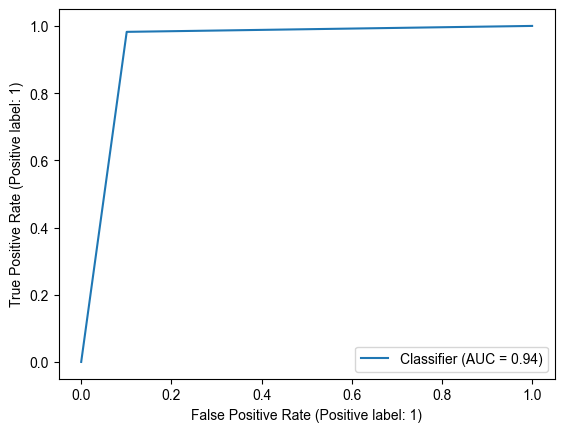

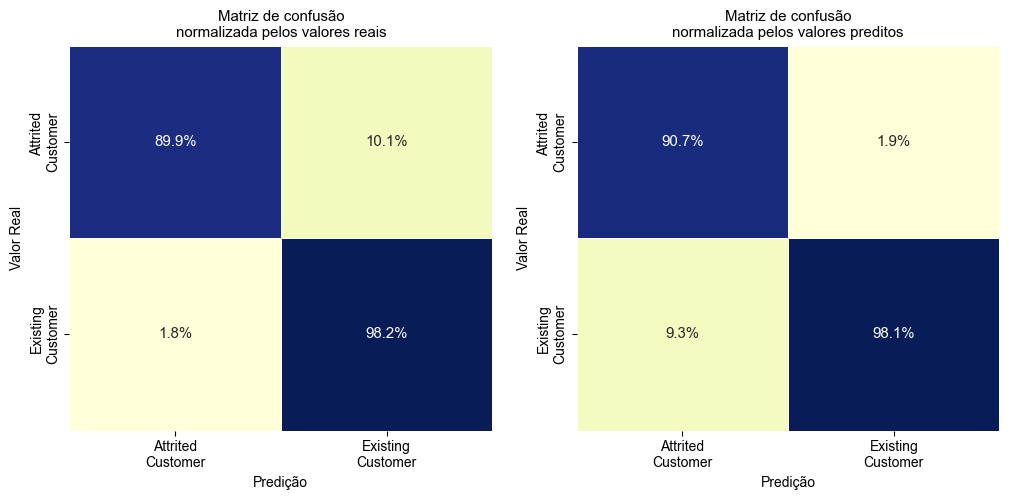

In [20]:
y_pred_test = best_model.predict(X_test)

print_metrics(y_test, y_pred_test)

get_cm_sklearn(
    y_test,
    y_pred_test,
    labels=[
        "\n".join(label.split())
        for label in training_preprocessor.label_encoder.classes_
    ],
)